In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle

In [4]:
path="/content/drive/MyDrive/CVD_cleaned.csv"
df=pd.read_csv(path)

In [5]:
import seaborn as sns
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [7]:
temp=df.to_numpy()
print(temp)
for i in range(len(temp)):
  if(temp[i][10]!="80+"):
    t=(int(temp[i][10][3:])+int(temp[i][10][:2]))/2
    temp[i][10]=t
  else:
    temp[i][10]=int(85)
columns=df.columns
print(columns)
df=pd.DataFrame(temp,columns=columns)
df.head()

[['Poor' 'Within the past 2 years' 'No' ... 30.0 16.0 12.0]
 ['Very Good' 'Within the past year' 'No' ... 30.0 0.0 4.0]
 ['Very Good' 'Within the past year' 'Yes' ... 12.0 3.0 16.0]
 ...
 ['Very Good' '5 or more years ago' 'Yes' ... 40.0 8.0 4.0]
 ['Very Good' 'Within the past year' 'Yes' ... 30.0 12.0 0.0]
 ['Excellent' 'Within the past year' 'Yes' ... 5.0 12.0 1.0]]
Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,72.0,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,72.0,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,62.0,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,77.0,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,85,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [8]:
df1 = pd.get_dummies(df, columns = ['General_Health', 'Checkup'])
df1.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),...,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,No,No,No,No,No,No,Yes,Female,72.0,150.0,...,0,0,0,1,0,0,0,1,0,0
1,No,Yes,No,No,No,Yes,No,Female,72.0,165.0,...,0,0,0,0,1,0,0,0,0,1
2,Yes,No,No,No,No,Yes,No,Female,62.0,163.0,...,0,0,0,0,1,0,0,0,0,1
3,Yes,Yes,No,No,No,Yes,No,Male,77.0,180.0,...,0,0,0,1,0,0,0,0,0,1
4,No,No,No,No,No,No,No,Male,85,191.0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
df1.columns

Index(['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health_Excellent', 'General_Health_Fair',
       'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year'],
      dtype='object')

In [10]:
df1["Exercise"] = np.where(df1["Exercise"] == "No", 0, 1)
df1["Heart_Disease"] = np.where(df1["Heart_Disease"] == "No", 0, 1)
df1["Skin_Cancer"] = np.where(df1["Skin_Cancer"] == "No", 0, 1)
df1["Other_Cancer"] = np.where(df1["Other_Cancer"] == "No", 0, 1)
df1["Depression"] = np.where(df1["Depression"] == "No", 0, 1)
df1["Diabetes"] = np.where(df1["Diabetes"] == "No", 0, 1)
df1["Arthritis"] = np.where(df1["Arthritis"] == "No", 0, 1)
df1["Sex"] = np.where(df1["Sex"] == "Female", 0, 1)
df1["Smoking_History"] = np.where(df1["Smoking_History"] == "No", 0, 1)
df1.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),...,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,0,0,0,0,0,0,1,0,72.0,150.0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,72.0,165.0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,62.0,163.0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,77.0,180.0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,85,191.0,...,0,0,1,0,0,0,0,0,0,1


In [11]:
df1.drop(['Height_(cm)', 'Weight_(kg)','FriedPotato_Consumption'], axis=1,inplace=True)
df1.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,...,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,0,0,0,0,0,0,1,0,72.0,14.54,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,72.0,28.29,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,62.0,33.47,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,77.0,28.73,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,85,24.37,...,0,0,1,0,0,0,0,0,0,1


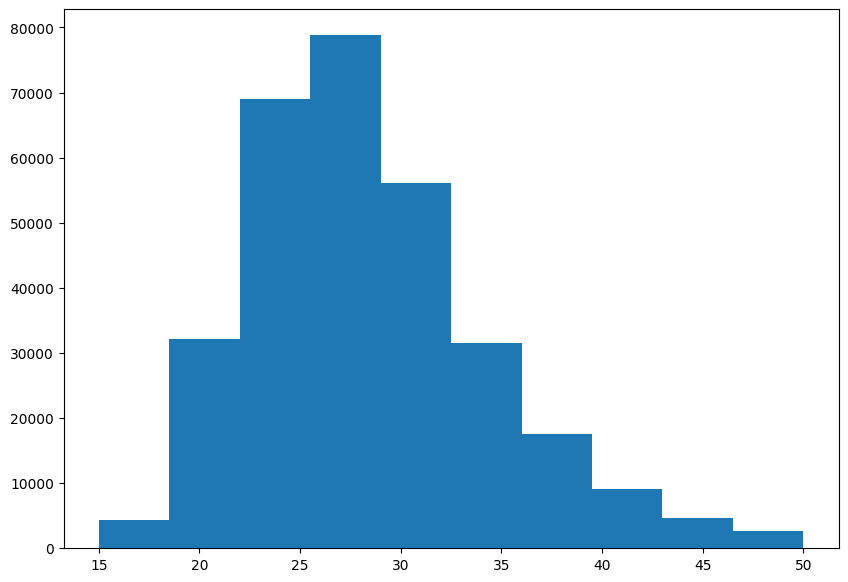

In [12]:
df_filtered = df1[df1['BMI'] <= 50]
df_filtered = df_filtered[df_filtered['BMI'] >= 15]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_filtered['BMI'])
plt.show()

In [13]:
df_filtered.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,...,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
1,0,1,0,0,0,1,0,0,72.0,28.29,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,62.0,33.47,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,77.0,28.73,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,85,24.37,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,1,0,1,1,62.0,46.11,...,0,0,1,0,0,0,0,0,0,1


In [14]:
df_new=df_filtered[['Age_Category','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption']].copy()
df_new.head()
df_new.columns

Index(['Age_Category', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption'],
      dtype='object')

In [15]:
x=df_new.to_numpy()
print(x)

[[72.0 28.29 0.0 30.0 0.0]
 [62.0 33.47 4.0 12.0 3.0]
 [77.0 28.73 0.0 30.0 30.0]
 ...
 [32.0 24.69 4.0 40.0 8.0]
 [67.0 23.73 3.0 30.0 12.0]
 [47.0 31.71 1.0 5.0 12.0]]


In [16]:

from sklearn.preprocessing import StandardScaler

In [17]:
scaler1 = StandardScaler()
scaled = scaler1.fit_transform(x)
print(scaled)

[[ 0.94556043 -0.01560718 -0.62358606  0.00511728 -1.0138001 ]
 [ 0.39307416  0.85770315 -0.13674966 -0.71838797 -0.81293045]
 [ 1.22180357  0.05857362 -0.62358606  0.00511728  0.99489642]
 ...
 [-1.26438466 -0.62254099 -0.13674966  0.40706464 -0.47814769]
 [ 0.6693173  -0.78439001 -0.25845876  0.00511728 -0.21032149]
 [-0.43565525  0.56097995 -0.50187696 -0.99975112 -0.21032149]]


In [18]:
df_temp = pd.DataFrame(scaled, columns = ['Age_Category', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption'])
df_temp.head()

,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,0.945560,-0.015607,-0.623586,0.005117,-1.013800
1,0.393074,0.857703,-0.136750,-0.718388,-0.812930
2,1.221804,0.058574,-0.623586,0.005117,0.994896
3,1.663793,-0.676491,-0.623586,-0.879167,-0.745974
4,0.393074,2.988715,-0.623586,-0.718388,-0.210321


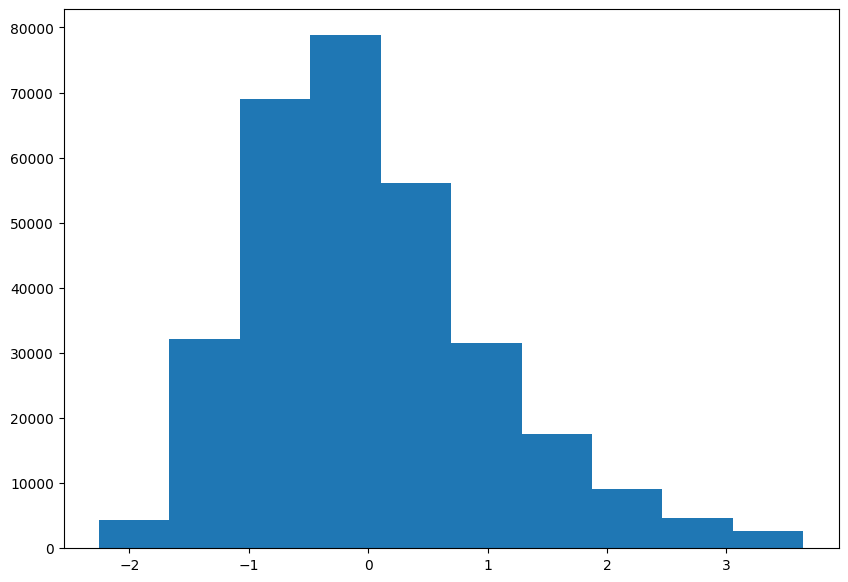

In [19]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_temp['BMI'])
plt.show()

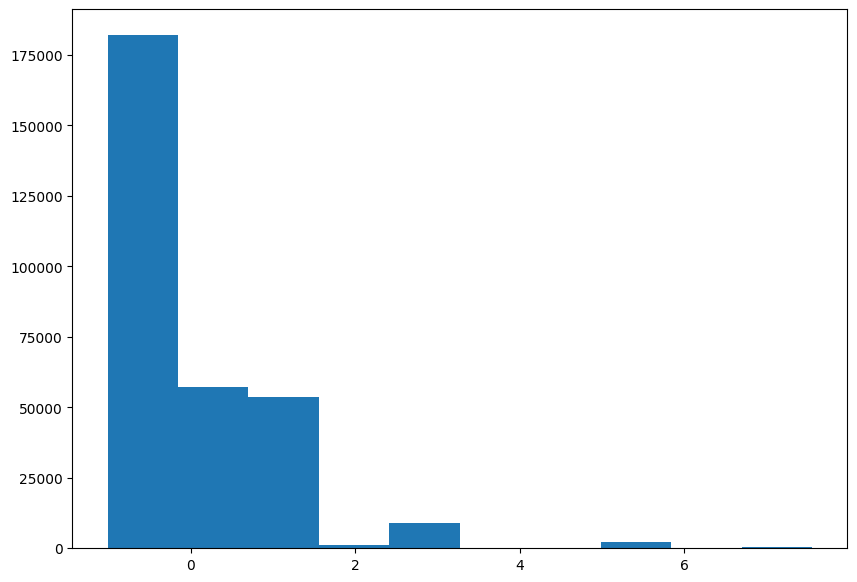

In [20]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_temp['Green_Vegetables_Consumption'])
plt.show()

In [21]:
df_filtered.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,...,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
1,0,1,0,0,0,1,0,0,72.0,28.29,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,62.0,33.47,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,77.0,28.73,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,85,24.37,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,1,0,1,1,62.0,46.11,...,0,0,1,0,0,0,0,0,0,1


In [22]:
df_filtered.drop(['Age_Category', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption'],axis=1,inplace=True)
df_filtered.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1


In [23]:
df_filtered['Age_Category']=df_temp['Age_Category'].values

In [24]:
df_filtered.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.945560
2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.393074
3,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.221804
4,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1.663793
5,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.393074


In [25]:
df_filtered.count(axis=1)

1         20
2         20
3         20
4         20
5         20
          ..
308849    20
308850    20
308851    20
308852    20
308853    20
Length: 305815, dtype: int64

In [26]:

df_filtered['BMI']=df_temp['BMI'].values
df_filtered['Alcohol_Consumption']=df_temp['Alcohol_Consumption'].values
df_filtered['Fruit_Consumption']=df_temp['Fruit_Consumption'].values
df_filtered['Green_Vegetables_Consumption']=df_temp['Green_Vegetables_Consumption'].values
df_filtered.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,...,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.945560,-0.015607,-0.623586,0.005117,-1.013800
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.393074,0.857703,-0.136750,-0.718388,-0.812930
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1.221804,0.058574,-0.623586,0.005117,0.994896
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1.663793,-0.676491,-0.623586,-0.879167,-0.745974
5,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0.393074,2.988715,-0.623586,-0.718388,-0.210321


In [27]:
df_filtered.count(axis=1)

1         24
2         24
3         24
4         24
5         24
          ..
308849    24
308850    24
308851    24
308852    24
308853    24
Length: 305815, dtype: int64

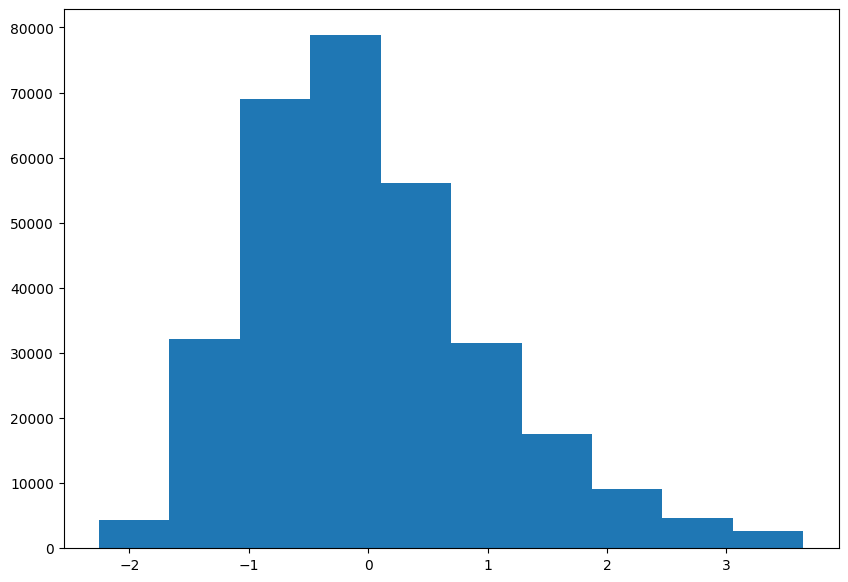

In [28]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_filtered['BMI'])
plt.show()

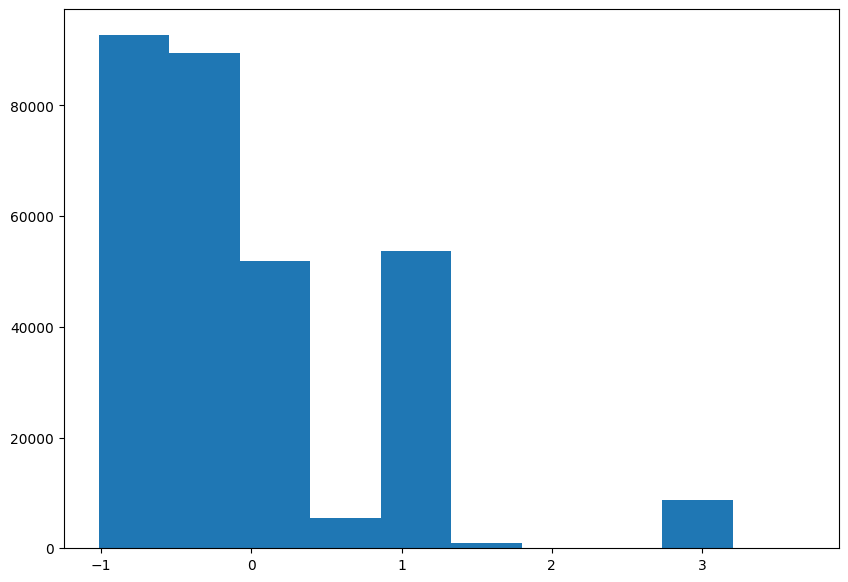

In [29]:
df_filtered = df_filtered[df_filtered['Green_Vegetables_Consumption'] <= 4]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_filtered['Green_Vegetables_Consumption'])
plt.show()

In [30]:
df_filtered.count(axis=1)

1         24
2         24
3         24
4         24
5         24
          ..
308849    24
308850    24
308851    24
308852    24
308853    24
Length: 302948, dtype: int64

In [31]:
df_filtered.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,...,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.945560,-0.015607,-0.623586,0.005117,-1.013800
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.393074,0.857703,-0.136750,-0.718388,-0.812930
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1.221804,0.058574,-0.623586,0.005117,0.994896
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1.663793,-0.676491,-0.623586,-0.879167,-0.745974
5,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0.393074,2.988715,-0.623586,-0.718388,-0.210321


In [32]:
df_filtered.count()

Exercise                           302948
Heart_Disease                      302948
Skin_Cancer                        302948
Other_Cancer                       302948
Depression                         302948
Diabetes                           302948
Arthritis                          302948
Sex                                302948
Smoking_History                    302948
General_Health_Excellent           302948
General_Health_Fair                302948
General_Health_Good                302948
General_Health_Poor                302948
General_Health_Very Good           302948
Checkup_5 or more years ago        302948
Checkup_Never                      302948
Checkup_Within the past 2 years    302948
Checkup_Within the past 5 years    302948
Checkup_Within the past year       302948
Age_Category                       302948
BMI                                302948
Alcohol_Consumption                302948
Fruit_Consumption                  302948
Green_Vegetables_Consumption      

In [33]:
X=df_filtered.to_numpy()
print(X)
print(df_filtered.columns)

[[ 0.          1.          0.         ... -0.62358606  0.00511728
  -1.0138001 ]
 [ 1.          0.          0.         ... -0.13674966 -0.71838797
  -0.81293045]
 [ 1.          1.          0.         ... -0.62358606  0.00511728
   0.99489642]
 ...
 [ 1.          0.          0.         ... -0.13674966  0.40706464
  -0.47814769]
 [ 1.          0.          0.         ... -0.25845876  0.00511728
  -0.21032149]
 [ 1.          0.          0.         ... -0.50187696 -0.99975112
  -0.21032149]]
Index(['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History',
       'General_Health_Excellent', 'General_Health_Fair',
       'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year',
       'Age_Category', 'BMI', 'Alcohol_Consumption', 'Fruit

In [34]:
df_final = pd.DataFrame(X, columns = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer','Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History','General_Health_Excellent', 'General_Health_Fair','General_Health_Good', 'General_Health_Poor','General_Health_Very Good', 'Checkup_5 or more years ago','Checkup_Never', 'Checkup_Within the past 2 years','Checkup_Within the past 5 years', 'Checkup_Within the past year','Age_Category', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption'])

In [35]:
df_final.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,...,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.945560,-0.015607,-0.623586,0.005117,-1.013800
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.393074,0.857703,-0.136750,-0.718388,-0.812930
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.221804,0.058574,-0.623586,0.005117,0.994896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.663793,-0.676491,-0.623586,-0.879167,-0.745974
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.393074,2.988715,-0.623586,-0.718388,-0.210321


In [36]:
df_final.count(axis=1)

0         24
1         24
2         24
3         24
4         24
          ..
302943    24
302944    24
302945    24
302946    24
302947    24
Length: 302948, dtype: int64

In [37]:
y=df_final[['Heart_Disease']].copy()
print(y)

        Heart_Disease
0                 1.0
1                 0.0
2                 1.0
3                 0.0
4                 0.0
...               ...
302943            0.0
302944            0.0
302945            0.0
302946            0.0
302947            0.0

[302948 rows x 1 columns]


In [38]:
df_final.drop(['Heart_Disease'],axis=1,inplace=True)
df_final.head()

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,General_Health_Fair,...,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.945560,-0.015607,-0.623586,0.005117,-1.013800
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.393074,0.857703,-0.136750,-0.718388,-0.812930
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.221804,0.058574,-0.623586,0.005117,0.994896
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.663793,-0.676491,-0.623586,-0.879167,-0.745974
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.393074,2.988715,-0.623586,-0.718388,-0.210321


In [39]:
scaler2=StandardScaler()
scaler2.fit(df_final)


StandardScaler()

In [40]:
scaled_data=scaler2.transform(df_final)

In [41]:
print(scaled_data)

[[-1.86768614 -0.32937765 -0.32773739 ... -0.62320592  0.01362733
  -1.13588948]
 [ 0.53542187 -0.32937765 -0.32773739 ... -0.13638695 -0.71558838
  -0.89872801]
 [ 0.53542187 -0.32937765 -0.32773739 ... -0.62320592  0.01362733
   1.23572524]
 ...
 [ 0.53542187 -0.32937765 -0.32773739 ... -0.13638695  0.41874718
  -0.50345889]
 [ 0.53542187 -0.32937765 -0.32773739 ... -0.25809169  0.01362733
  -0.18724359]
 [ 0.53542187 -0.32937765 -0.32773739 ... -0.50150118 -0.99917227
  -0.18724359]]


In [42]:
from sklearn.decomposition import PCA

In [43]:
pca=PCA(n_components=2)

In [44]:
pca.fit(scaled_data)

PCA(n_components=2)

In [45]:
x_pca=pca.transform(scaled_data)

In [46]:
scaled_data.shape

(302948, 23)

In [47]:
x_pca.shape

(302948, 2)

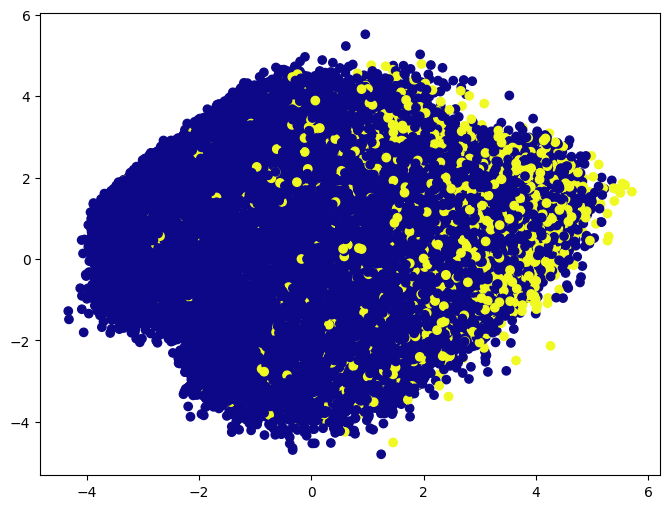

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y["Heart_Disease"],cmap='plasma')
plt.show()

In [49]:
pca.explained_variance_ratio_

array([0.11384916, 0.08062256])

In [50]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)

In [51]:
from mpl_toolkits import mplot3d

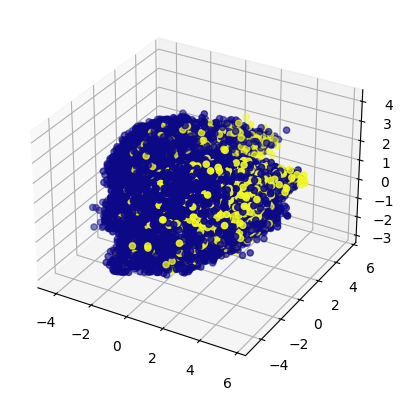

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 0], X_t[:, 1], X_t[:, 2], c=y["Heart_Disease"], cmap='plasma')
plt.show()

In [53]:
pca_3.explained_variance_ratio_

array([0.11383546, 0.08058721, 0.06292391])

In [54]:
print(y["Heart_Disease"].value_counts())

0.0    278437
1.0     24511
Name: Heart_Disease, dtype: int64


In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [55]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

rus=RepeatedEditedNearestNeighbours(sampling_strategy='auto',max_iter=30)
x_res,y_res=rus.fit_resample(df_final,y['Heart_Disease'])



In [56]:
x_res.shape

(235172, 23)

In [57]:
y_res.shape

(235172,)

In [58]:
print(x_res)

        Exercise  Skin_Cancer  Other_Cancer  Depression  Diabetes  Arthritis  \
0            1.0          0.0           0.0         0.0       1.0        0.0   
1            0.0          0.0           0.0         1.0       0.0        1.0   
2            1.0          0.0           0.0         0.0       0.0        1.0   
3            1.0          0.0           0.0         0.0       0.0        0.0   
4            0.0          0.0           0.0         0.0       0.0        0.0   
...          ...          ...           ...         ...       ...        ...   
235167       0.0          0.0           0.0         0.0       1.0        0.0   
235168       1.0          0.0           0.0         0.0       0.0        1.0   
235169       1.0          0.0           0.0         0.0       1.0        0.0   
235170       0.0          0.0           1.0         0.0       1.0        0.0   
235171       1.0          0.0           0.0         1.0       1.0        0.0   

        Sex  Smoking_History  General_H

In [59]:
print(y_res.value_counts())

0.0    210661
1.0     24511
Name: Heart_Disease, dtype: int64


In [60]:
scaler2=StandardScaler()
scaler2.fit(x_res)
scaled_data=scaler2.transform(x_res)

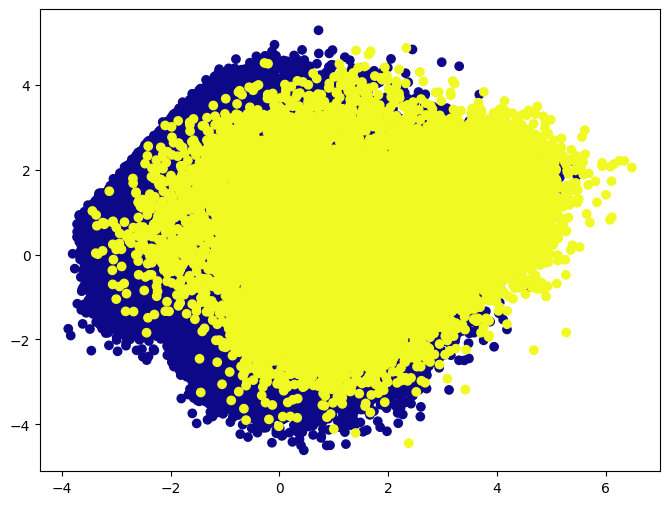

In [61]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res,cmap='plasma')
plt.show()

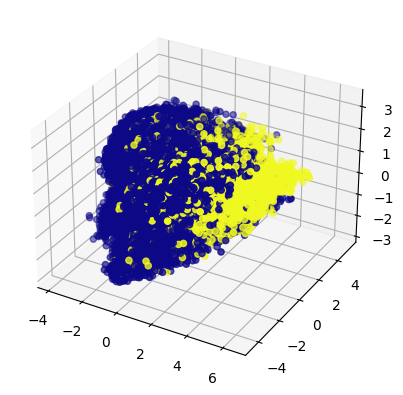

In [62]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 0], X_t[:, 1], X_t[:, 2], c=y_res, cmap='plasma')
plt.show()

In [63]:
x_res.head()

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,General_Health_Fair,...,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.393074,0.857703,-0.136750,-0.718388,-0.812930
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.393074,2.988715,-0.623586,-0.718388,-0.210321
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.669317,1.948498,-0.258459,0.005117,-0.478148
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.945560,-0.998503,-0.623586,0.005117,-0.745974
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.663793,0.245712,-0.623586,-1.160530,-0.745974


In [ ]:
from imblearn.under_sampling import NearMiss

rus=NearMiss(sampling_strategy=0.5)
x_res1,y_res1=rus.fit_resample(x_res,y_res)



NameError: ignored

In [ ]:
print(y_res1.value_counts())

0.0    49022
1.0    24511
Name: Heart_Disease, dtype: int64


In [ ]:
scaler2=StandardScaler()
scaler2.fit(x_res1)
scaled_data=scaler2.transform(x_res1)

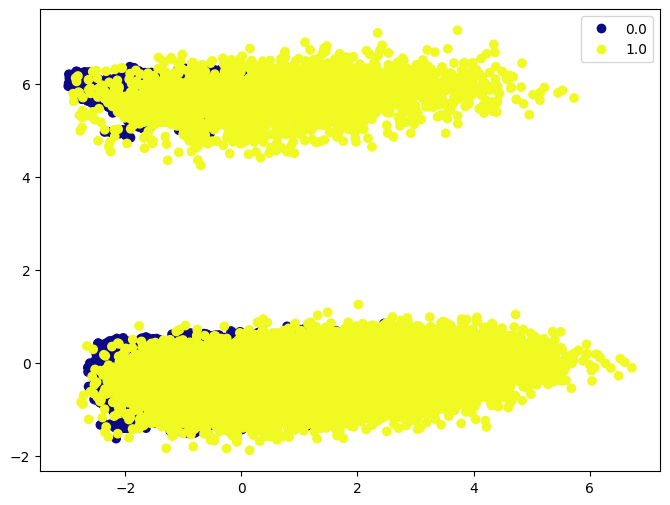

In [ ]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res1,cmap='plasma')

unique_categories = sorted(set(y_res1))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

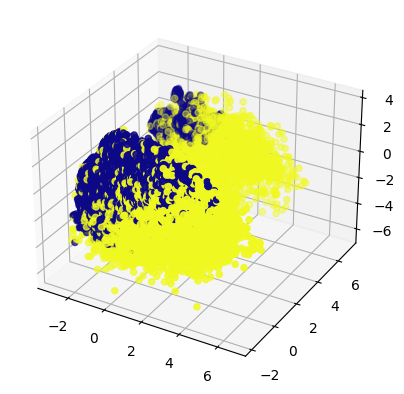

In [ ]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 0], X_t[:, 1], -X_t[:, 2], c=y_res1, cmap='plasma')
plt.show()

In [ ]:
pca_3.explained_variance_ratio_

array([0.11573751, 0.08885894, 0.0721456 ])

In [ ]:
rus=NearMiss(sampling_strategy=0.25,version=3)
x_res2,y_res2=rus.fit_resample(x_res,y_res)
print(y_res2.value_counts())

0.0    34962
1.0    24511
Name: Heart_Disease, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [ ]:
x_res2.shape

(59473, 23)

In [ ]:
scaler2=StandardScaler()
scaler2.fit(x_res2)
scaled_data=scaler2.transform(x_res2)

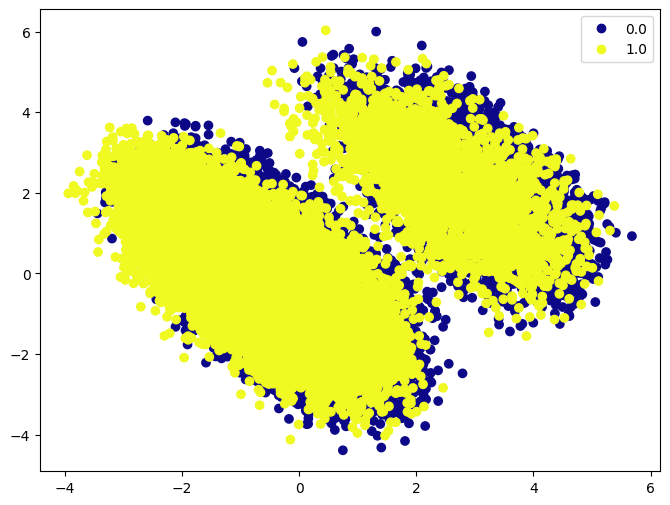

In [ ]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res2,cmap='plasma')

unique_categories = sorted(set(y_res2))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

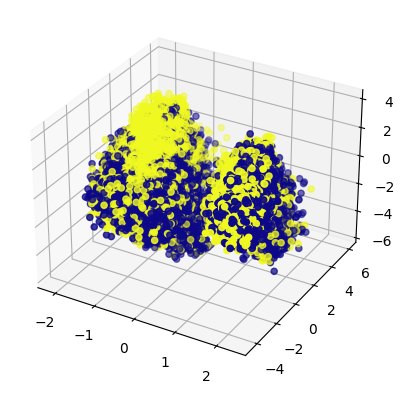

In [ ]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 2], X_t[:, 1], -X_t[:, 0], c=y_res2, cmap='plasma')
plt.show()

In [ ]:
pca_3.explained_variance_ratio_

array([0.09591517, 0.08884815, 0.06501556])

In [ ]:
x_res2.head()

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,General_Health_Excellent,General_Health_Fair,...,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Age_Category,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.945560,1.881061,3.027687,-0.879167,3.003593
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.988142,2.160925,2.784269,-1.120335,0.994896
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.663793,-2.185396,1.202050,2.416801,0.057505
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.159412,2.769545,3.027687,-1.200725,0.325331
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.435655,2.294113,-0.623586,1.210959,3.003593


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train_nm3, X_test_nm3, y_train_nm3, y_val_nm3 = train_test_split(x_res2, y_res2, train_size = 0.7, random_state = 42)

In [ ]:
xgb=XGBClassifier(randomstate=42)
cv=cross_val_score(xgb,X_train_nm3,y_train_nm3,cv=5)
print(cv)
print(cv.mean())

[11:41:40] WARNING: ../src/learner.cc:767: 
Parameters: { "randomstate" } are not used.

[11:41:48] WARNING: ../src/learner.cc:767: 
Parameters: { "randomstate" } are not used.

[11:41:52] WARNING: ../src/learner.cc:767: 
Parameters: { "randomstate" } are not used.

[11:41:56] WARNING: ../src/learner.cc:767: 
Parameters: { "randomstate" } are not used.

[11:42:02] WARNING: ../src/learner.cc:767: 
Parameters: { "randomstate" } are not used.

[0.72751291 0.72267595 0.72904156 0.73120346 0.72663944]
0.7274146645950081


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
cv=cross_val_score(rf,X_train_nm3,y_train_nm3,cv=5)
print(cv)
print(cv.mean())

[0.75669509 0.7573865  0.76423252 0.76891665 0.7595484 ]
0.7613558324504379


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,X_train_nm3,y_train_nm3,cv=5)
print(cv)
print(cv.mean())

[0.72246908 0.71282729 0.719313   0.72315638 0.72171511]
0.7198961693712107


In [ ]:
rf=RandomForestClassifier(random_state=1)

parameters = {
    'max_depth': [5,15,25,None],
    'n_estimators': [50,100,500],
    'min_samples_split': [10,30]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    cv = 5,
    n_jobs=-1,
    verbose=True
)

grid_search.fit(X_train_nm3, y_train_nm3)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 15, 25, None],
                         'min_samples_split': [10, 30],
                         'n_estimators': [50, 100, 500]},
             verbose=True)

In [ ]:
final_cf1=grid_search.best_estimator_

In [ ]:
final_cf1

RandomForestClassifier(min_samples_split=10, n_estimators=500, random_state=1)

In [ ]:
final_cf1.score(X_train_nm3, y_train_nm3)

0.8894813960750403

In [ ]:
final_cf1.score(df_final,y['Heart_Disease'])

0.8663830096254143

In [ ]:
y_final1=final_cf1.predict(df_final)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y['Heart_Disease'],y_final1)

0.8663830096254143

In [75]:
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final1)

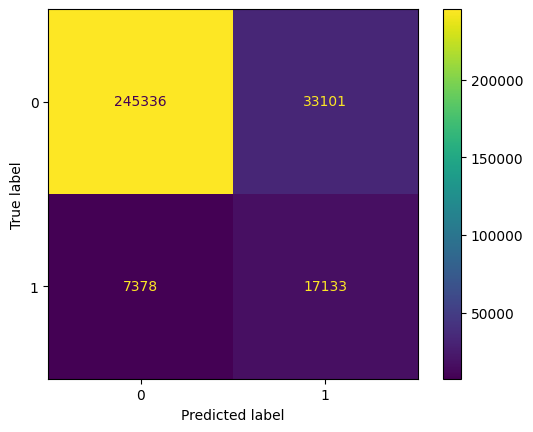

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier(random_state=1)

parameters = {
    'max_depth': [5,25,None],
    'n_estimators': [100,500,800],
    'min_samples_split': [5,10,30]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    cv = 5,
    n_jobs=-1,
    verbose=True,
    scoring='f1'
)

grid_search.fit(X_train_nm3, y_train_nm3)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 25, None],
                         'min_samples_split': [5, 10, 30],
                         'n_estimators': [100, 500, 800]},
             scoring='f1', verbose=True)

In [ ]:
final_cf2=grid_search.best_estimator_

In [ ]:
final_cf2

RandomForestClassifier(min_samples_split=5, n_estimators=800, random_state=1)

In [ ]:
final_cf2.score(X_train_nm3, y_train_nm3)

0.9693978045206697

In [ ]:
final_cf2.score(df_final,y['Heart_Disease'])

0.8705322365554484

In [ ]:
y_final2=final_cf2.predict(df_final)

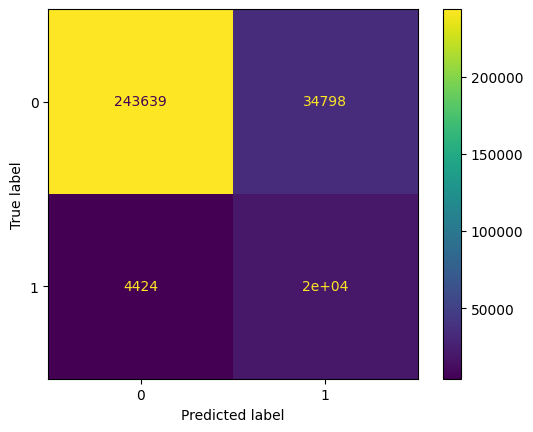

In [ ]:
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
xgb=XGBClassifier(random_state=1)

parameters = {
    'max_depth': [5,15,25,None],
    'n_estimators': [50,100,500],
    'min_samples_split': [10,30]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    cv = 5,
    n_jobs=-1,
    verbose=True,
    scoring="f1"
)

grid_search.fit(X_train_nm3, y_train_nm3)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 15, 25, None],
                         'min_samples_split': [10, 30],
                         'n_estimators': [50, 100, 500]},
             scoring='f1', verbose=True)

In [ ]:
final_cf3=grid_search.best_estimator_

In [ ]:
final_cf3

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [ ]:
final_cf2.score(X_test_nm3,y_val_nm3)

0.7656092366326644

In [ ]:
final_cf1.score(X_test_nm3,y_val_nm3)

0.7577625826701042

In [ ]:
y_final2_2=final_cf2.predict(X_test_nm3)

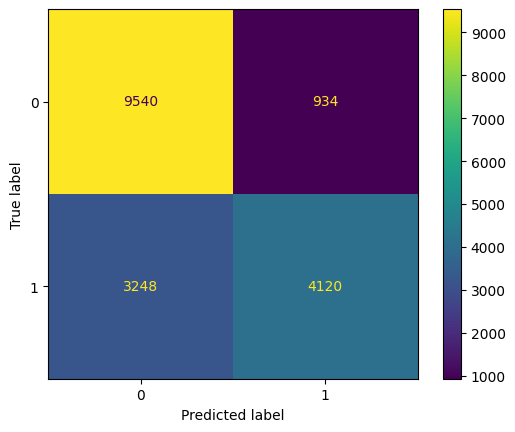

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val_nm3,y_final2_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
y_final1_2=final_cf1.predict(X_test_nm3)

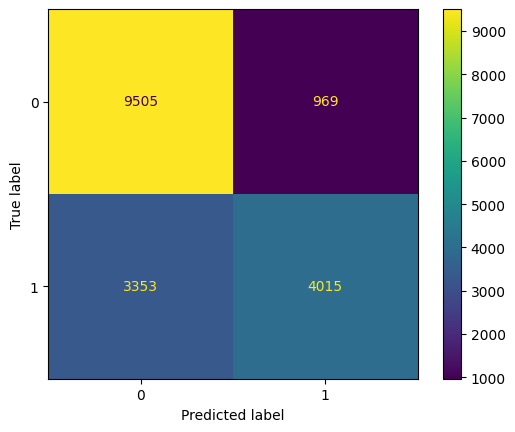

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val_nm3,y_final1_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
final_cf3=grid_search.best_estimator_

In [ ]:
final_cf3.score(X_train_nm3, y_train_nm3)

0.887992121255795

In [ ]:
final_cf3.score(X_test_nm3,y_val_nm3)

0.7595000560475283

In [ ]:
y_final3_2=final_cf3.predict(X_test_nm3)

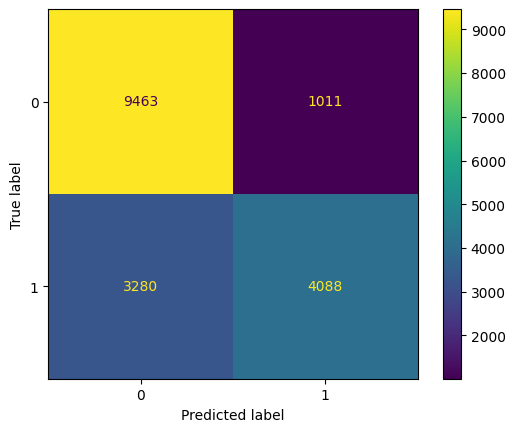

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val_nm3,y_final3_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
final_cf3.score(df_final,y['Heart_Disease'])

0.8615306917358755

In [ ]:
y_final3=final_cf3.predict(df_final)

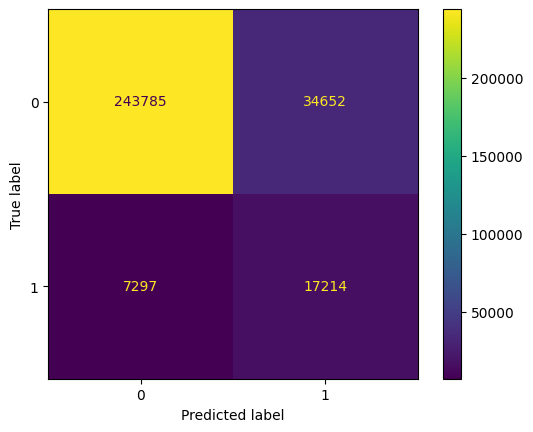

In [ ]:
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

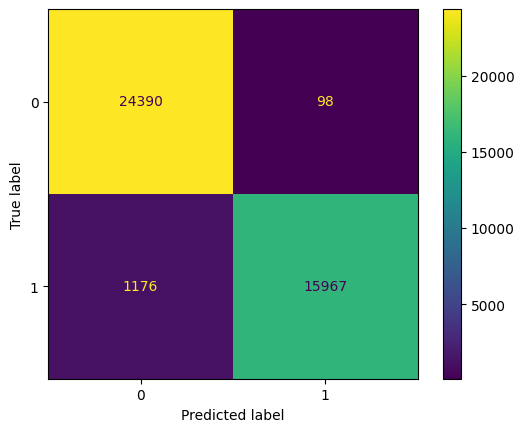

In [ ]:
y_final2_3=final_cf2.predict(X_train_nm3)
confusion_matrix = metrics.confusion_matrix(y_train_nm3,y_final2_3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

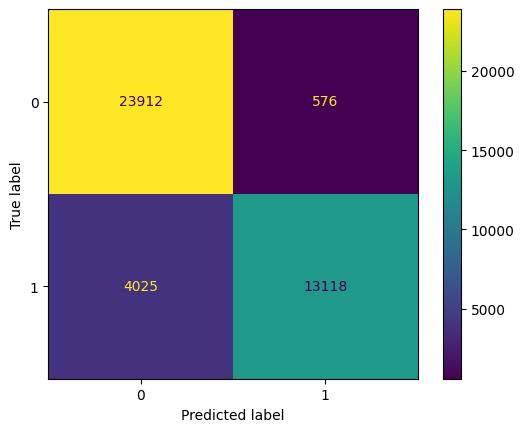

In [ ]:
y_final1_3=final_cf1.predict(X_train_nm3)
confusion_matrix = metrics.confusion_matrix(y_train_nm3,y_final1_3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_nm1, X_test_nm1, y_train_nm1, y_test_nm1 = train_test_split(x_res1, y_res1, train_size = 0.7, random_state = 42,shuffle=True,stratify=y_res1)

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:2})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    verbose=True
)

random_search.fit(X_train_nm1, y_train_nm1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25, 50, 75, None],
                                        'min_samples_split': [5, 10, 30],
                                        'n_estimators': [100, 500, 800, 1000]},
                   verbose=True)

In [ ]:
final_cf4=random_search.best_estimator_

In [ ]:
final_cf4

RandomForestClassifier(class_weight={0: 1, 1: 2}, min_samples_split=5,
                       n_estimators=800, random_state=1)

In [ ]:
final_cf4.score(X_test_nm1,y_test_nm1)

0.9

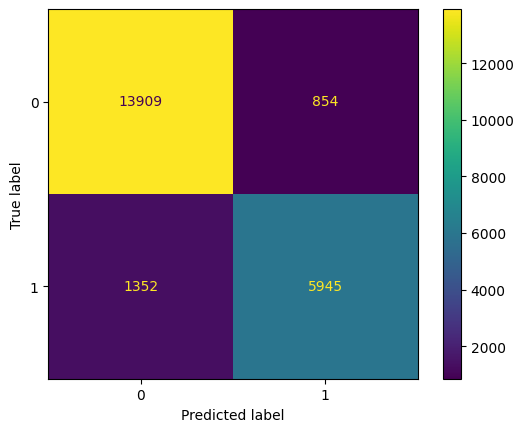

In [ ]:
y_final4_2=final_cf4.predict(X_test_nm1)
confusion_matrix = metrics.confusion_matrix(y_test_nm1,y_final4_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

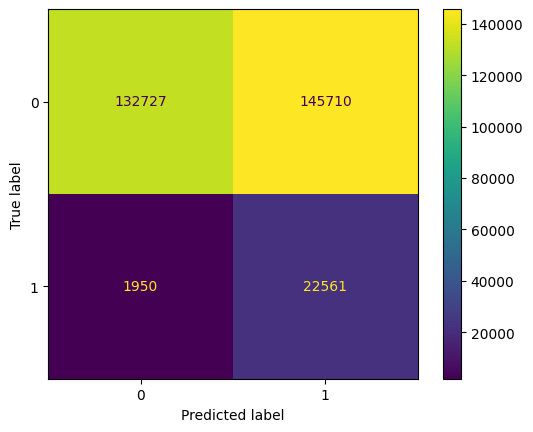

In [ ]:
y_final4=final_cf4.predict(df_final)
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final4)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
X_train_nm1, X_test_nm1, y_train_nm1, y_test_nm1 = train_test_split(x_res2, y_res2, train_size = 0.7, random_state = 42,shuffle=True,stratify=y_res2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
class_weight=dict({0:1,1:2})
SVC_model = SVC(probability = True, class_weight = class_weight)
parameters = {'C': [100],
              'gamma': [100],
              'kernel': ['rbf']}

grid = RandomizedSearchCV(estimator=SVC_model, param_distributions=parameters,n_iter=7,cv=3,n_jobs=-1, verbose = True)

# fitting the model for grid search
grid.fit(X_train_nm1, y_train_nm1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=7. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
class_weight=dict({0:1,1:2})
SVC_model = SVC(probability = True, class_weight = class_weight)
cv=cross_val_score(SVC_model,X_train_nm1,y_train_nm1,cv=3)
print(cv)
print(cv.mean())

[0.6879729 0.6879729 0.6919363]
0.6892940356945546


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:2})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    verbose=True
)

random_search.fit(X_train_nm1, y_train_nm1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25, 50, 75, None],
                                        'min_samples_split': [5, 10, 30],
                                        'n_estimators': [100, 500, 800, 1000]},
                   verbose=True)

In [ ]:
final_cf5=random_search.best_estimator_
final_cf5

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=25,
                       min_samples_split=5, n_estimators=500, random_state=1)

In [ ]:
class_weight=dict({0:1,1:2})

xgb=XGBClassifier(random_state=1)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30],
    'scale_pos_weight':[1,2]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    scoring = 'roc_auc',
    n_jobs=-1,
    verbose=True
)

random_search.fit(X_train_nm1, y_train_nm1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: ignored

In [ ]:
final_cf6=random_search.best_estimator_
final_cf6

In [ ]:
final_cf5.score(X_test_nm1,y_test_nm1)

0.7618540522362964

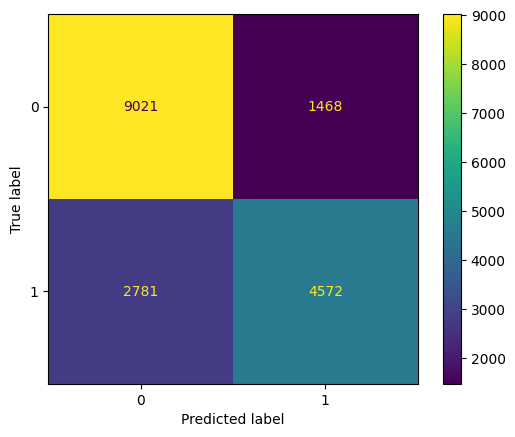

In [ ]:
y_final5_2=final_cf5.predict(X_test_nm1)
confusion_matrix = metrics.confusion_matrix(y_test_nm1,y_final5_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

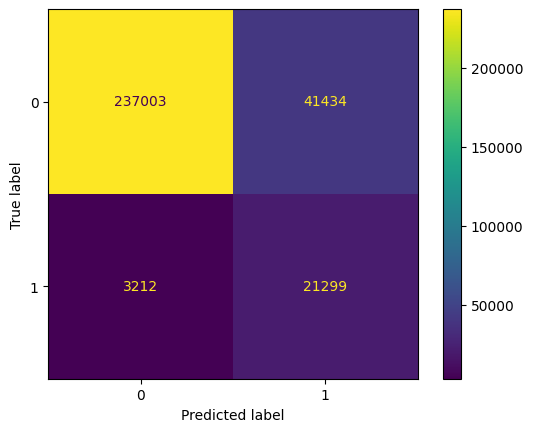

In [ ]:
y_final5=final_cf5.predict(df_final)
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final5)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
final_cf5.score(X_train_nm1,y_train_nm1)

0.981744373183445

In [ ]:
final_cf5.score(df_final,y['Heart_Disease'])

0.8526281738120074

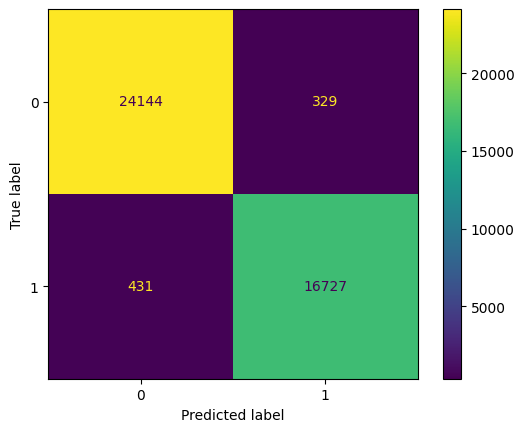

In [ ]:
y_final5_1=final_cf5.predict(X_train_nm1)
confusion_matrix = metrics.confusion_matrix(y_train_nm1,y_final5_1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from imblearn.under_sampling import NearMiss
rus=NearMiss(sampling_strategy=0.5,version=3,n_neighbors_ver3=5)
x_res3,y_res3=rus.fit_resample(x_res,y_res)
print(y_res3.value_counts())


In [ ]:
from imblearn.under_sampling import NearMiss
rus=NearMiss(sampling_strategy=0.2,version=3,n_neighbors_ver3=12)
x_res4,y_res4=rus.fit_resample(x_res,y_res)
print(y_res4.value_counts())

0.0    78719
1.0    24511
Name: Heart_Disease, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


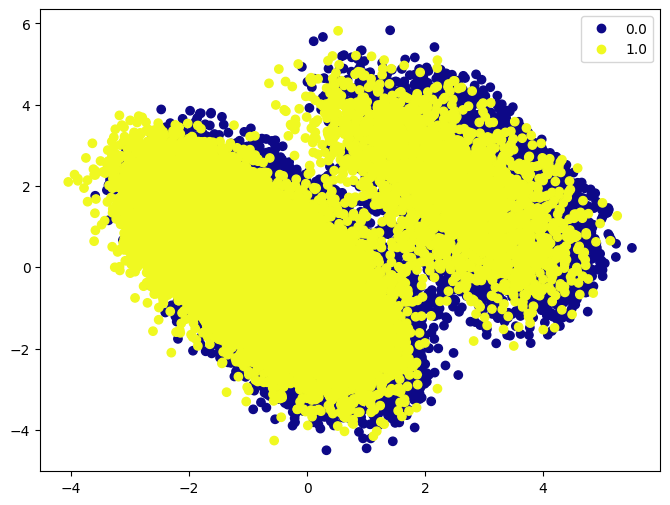

In [ ]:
scaler2=StandardScaler()
scaler2.fit(x_res3)
scaled_data=scaler2.transform(x_res3)

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res3,cmap='plasma')

unique_categories = sorted(set(y_res3))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

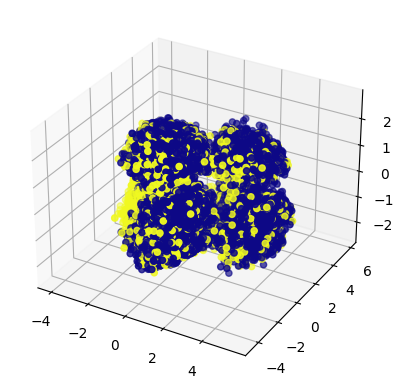

In [ ]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 0], X_t[:, 1], X_t[:, 2], c=y_res3, cmap='plasma')
plt.show()

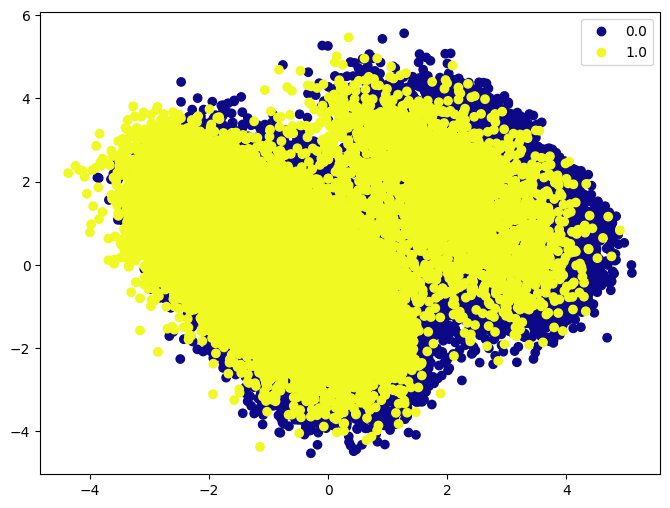

In [ ]:
scaler2=StandardScaler()
scaler2.fit(x_res4)
scaled_data=scaler2.transform(x_res4)

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res4,cmap='plasma')

unique_categories = sorted(set(y_res4))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

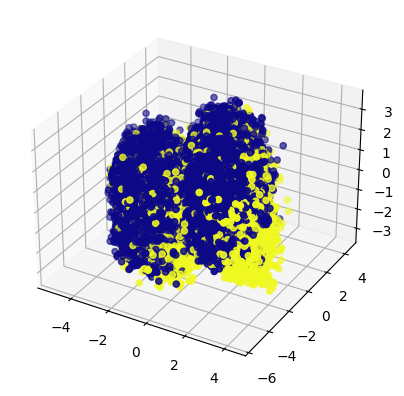

In [ ]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-X_t[:, 0], -X_t[:, 1], X_t[:, 2], c=y_res4, cmap='plasma')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_nm4, X_test_nm4, y_train_nm4, y_test_nm4 = train_test_split(x_res4, y_res4, train_size = 0.8, random_state = 42,shuffle=True,stratify=y_res4)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
print(y_train_nm4.value_counts())

0.0    62975
1.0    19609
Name: Heart_Disease, dtype: int64


In [ ]:
print(y_test_nm4.value_counts())

0.0    15744
1.0     4902
Name: Heart_Disease, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:4})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    verbose=True
)

random_search.fit(X_train_nm4, y_train_nm4)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:4})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=True
)

random_search.fit(X_train_nm4, y_train_nm4)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 4},
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25, 50, 75, None],
                                        'min_samples_split': [5, 10, 30],
                                        'n_estimators': [100, 500, 800, 1000]},
                   scoring='roc_auc', verbose=True)

In [ ]:
final_cf6=random_search.best_estimator_


In [ ]:
final_cf6

RandomForestClassifier(class_weight={0: 1, 1: 4}, min_samples_split=5,
                       n_estimators=800, random_state=1)

In [ ]:
final_cf6.score(X_test_nm4,y_test_nm4)

0.8616681197326359

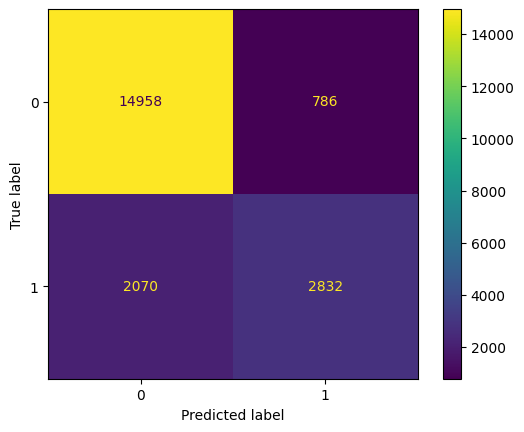

In [ ]:
y_final6_2=final_cf6.predict(X_test_nm4)
confusion_matrix = metrics.confusion_matrix(y_test_nm4,y_final6_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

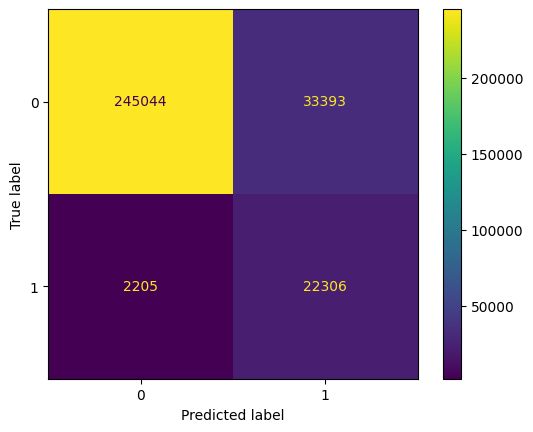

In [ ]:
y_final6=final_cf6.predict(df_final)
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final6)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
final_cf6.score(df_final,y['Heart_Disease'])

0.8824946855565972

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(sampling_strategy=1)
x_res5,y_res5=sm.fit_resample(X_train_nm4,y_train_nm4)
print(y_res5.value_counts())

0.0    62975
1.0    62975
Name: Heart_Disease, dtype: int64


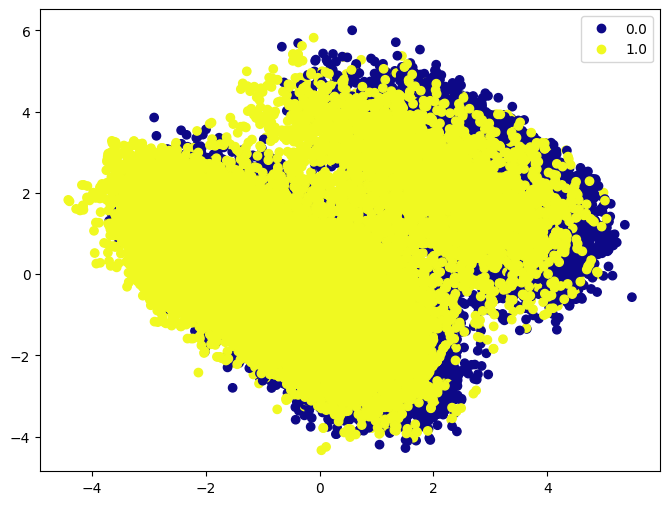

In [ ]:
scaler2=StandardScaler()
scaler2.fit(x_res5)
scaled_data=scaler2.transform(x_res5)

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res5,cmap='plasma')

unique_categories = sorted(set(y_res5))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

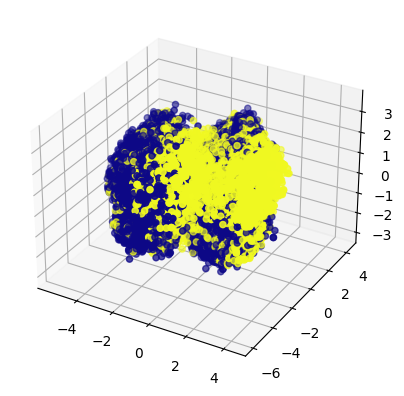

In [ ]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-X_t[:, 0], -X_t[:, 1], X_t[:, 2], c=y_res5, cmap='plasma')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:2})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=True
)

random_search.fit(x_res5, y_res5)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25, 50, 75, None],
                                        'min_samples_split': [5, 10, 30],
                                        'n_estimators': [100, 500, 800, 1000]},
                   scoring='roc_auc', verbose=True)

In [ ]:
final_cf7=random_search.best_estimator_
final_cf6

RandomForestClassifier(class_weight={0: 1, 1: 4}, min_samples_split=5,
                       n_estimators=800, random_state=1)

In [ ]:
final_cf7

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=75,
                       min_samples_split=5, n_estimators=1000, random_state=1)

In [ ]:
final_cf7.score(X_test_nm4,y_test_nm4)

0.8596822629080694

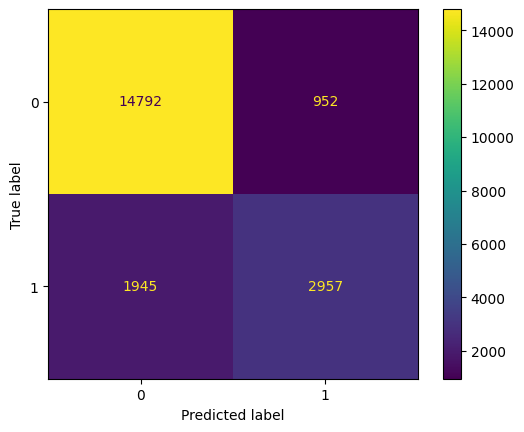

In [ ]:
y_final7_2=final_cf7.predict(X_test_nm4)
confusion_matrix = metrics.confusion_matrix(y_test_nm4,y_final7_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

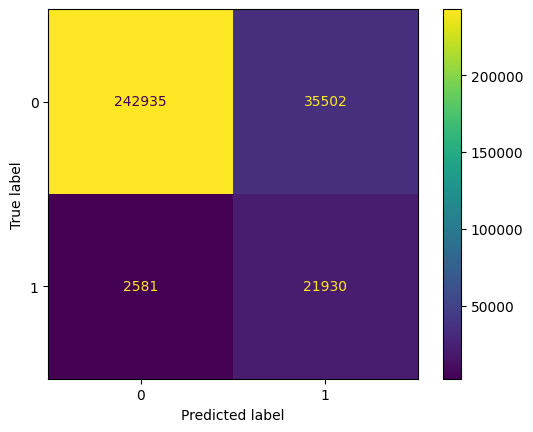

In [ ]:
y_final7=final_cf7.predict(df_final)
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final7)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
final_cf7.score(df_final,y['Heart_Disease'])

0.8742919576957101

In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:5})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=True
)

random_search.fit(x_res5, y_res5)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25, 50, 75, None],
                                        'min_samples_split': [5, 10, 30],
                                        'n_estimators': [100, 500, 800, 1000]},
                   scoring='roc_auc', verbose=True)

In [ ]:
final_cf8=random_search.best_estimator_

In [ ]:
final_cf8

RandomForestClassifier(class_weight={0: 1, 1: 5}, min_samples_split=5,
                       n_estimators=1000, random_state=1)

In [ ]:
final_cf8.score(X_test_nm4,y_test_nm4)


0.8521747554005619

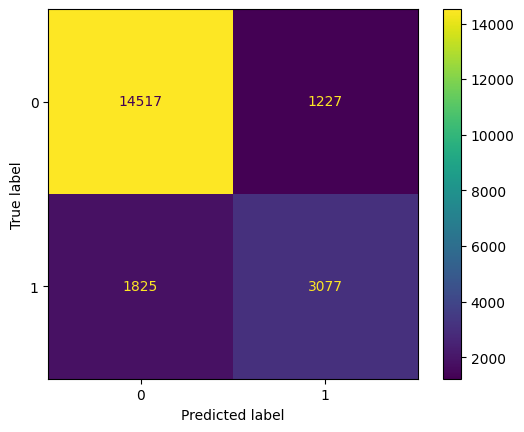

In [ ]:
y_final8_2=final_cf8.predict(X_test_nm4)
confusion_matrix = metrics.confusion_matrix(y_test_nm4,y_final8_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

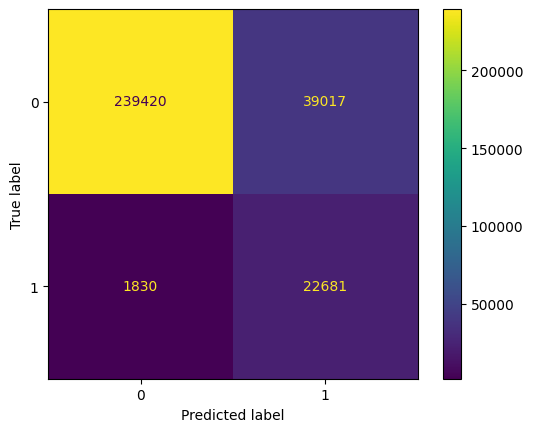

In [ ]:
y_final8=final_cf8.predict(df_final)
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final8)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
final_cf8.score(df_final,y['Heart_Disease'])

0.8651682797047678

In [64]:
from imblearn.under_sampling import NearMiss
rus=NearMiss(sampling_strategy=0.33,version=3,n_neighbors_ver3=15)
x_res6,y_res6=rus.fit_resample(x_res,y_res)
print(y_res6.value_counts())

0.0    74275
1.0    24511
Name: Heart_Disease, dtype: int64


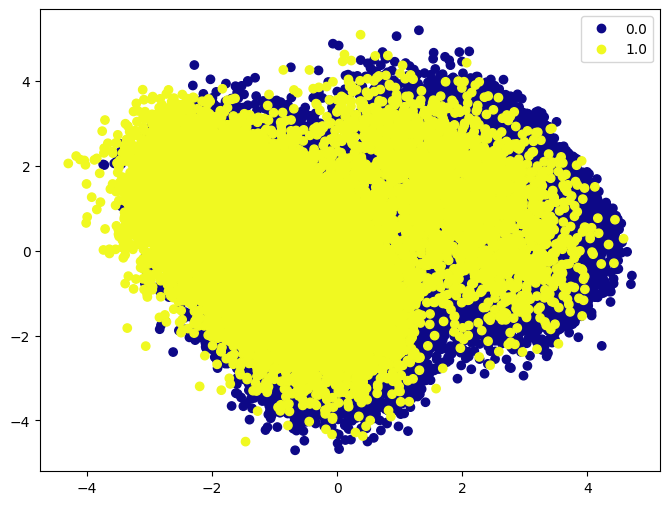

In [65]:
scaler2=StandardScaler()
scaler2.fit(x_res6)
scaled_data=scaler2.transform(x_res6)

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res6,cmap='plasma')

unique_categories = sorted(set(y_res6))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

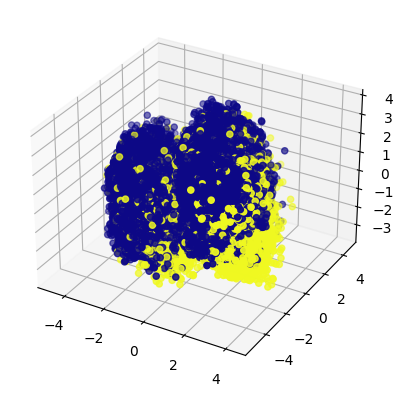

In [66]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-X_t[:, 0], -X_t[:, 1], X_t[:, 2], c=y_res6, cmap='plasma')
plt.show()

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
from sklearn.model_selection import train_test_split
X_train_nm5, X_test_nm5, y_train_nm5, y_test_nm5 = train_test_split(x_res6, y_res6, train_size = 0.8, random_state = 42,shuffle=True,stratify=y_res6)

In [69]:
print(y_train_nm5.value_counts())

0.0    59419
1.0    19609
Name: Heart_Disease, dtype: int64


In [70]:
print(y_test_nm5.value_counts())

0.0    14856
1.0     4902
Name: Heart_Disease, dtype: int64


In [71]:
sm=SMOTE(sampling_strategy=1)
x_res7,y_res7=sm.fit_resample(X_train_nm5,y_train_nm5)
print(y_res7.value_counts())

0.0    59419
1.0    59419
Name: Heart_Disease, dtype: int64


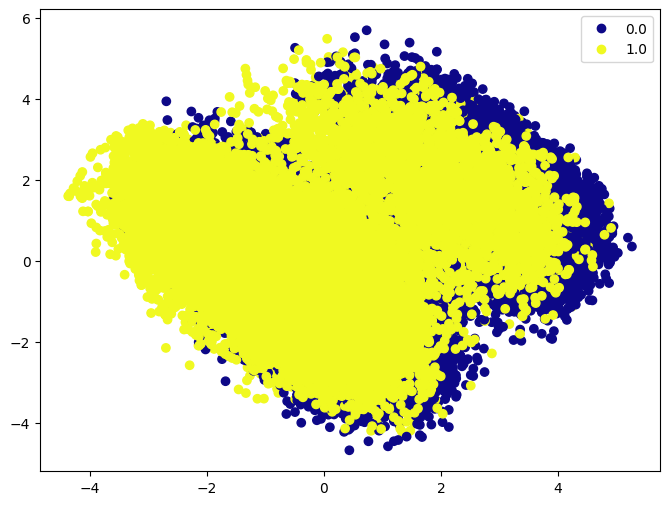

In [72]:
scaler2=StandardScaler()
scaler2.fit(x_res7)
scaled_data=scaler2.transform(x_res7)

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_res7,cmap='plasma')

unique_categories = sorted(set(y_res7))
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, unique_categories, loc='best')

plt.show()

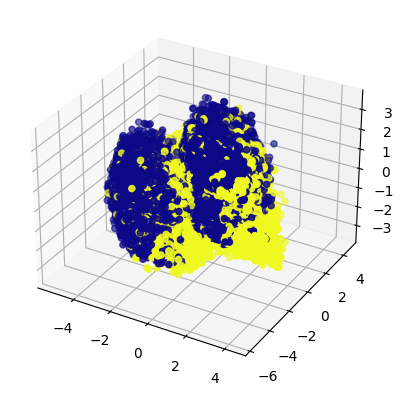

In [73]:
pca_3 = PCA(n_components = 3).fit(scaled_data)
X_t = pca_3.transform(scaled_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-X_t[:, 0], -X_t[:, 1], X_t[:, 2], c=y_res7, cmap='plasma')
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:5})

rf=RandomForestClassifier(random_state=1,class_weight=class_weight)

parameters = {
    'max_depth': [5,15,25,50,75,None],
    'n_estimators': [100,500,800,1000],
    'min_samples_split': [5,10,30]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=50,
    cv = 3,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=True
)

random_search.fit(x_res7, y_res7)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                    random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25, 50, 75, None],
                                        'min_samples_split': [5, 10, 30],
                                        'n_estimators': [100, 500, 800, 1000]},
                   scoring='roc_auc', verbose=True)

In [78]:
final_cf9=random_search.best_estimator_

In [79]:
final_cf9

RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=50,
                       min_samples_split=5, n_estimators=1000, random_state=1)

In [80]:
 final_cf9.score(X_test_nm5,y_test_nm5)

0.8563113675473226

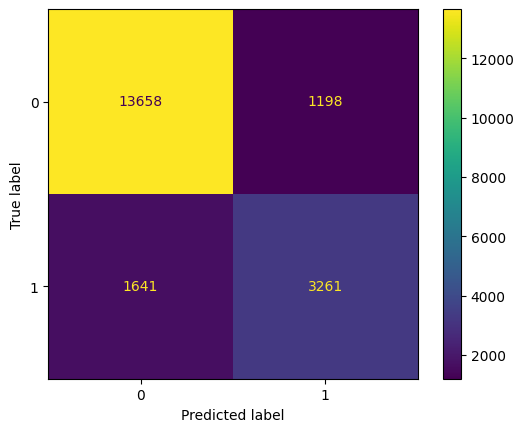

In [81]:
y_final9_2=final_cf9.predict(X_test_nm5)
confusion_matrix = metrics.confusion_matrix(y_test_nm5,y_final9_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

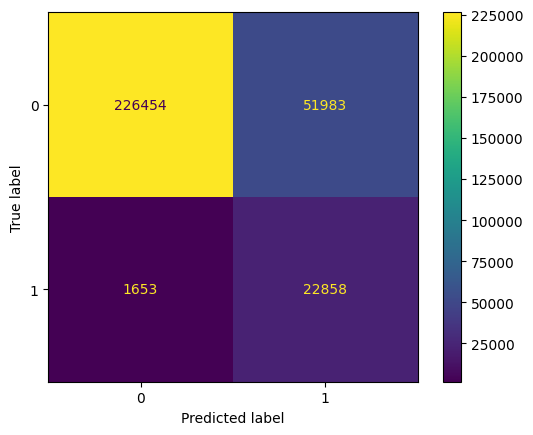

In [82]:
y_final9=final_cf9.predict(df_final)
confusion_matrix = metrics.confusion_matrix(y['Heart_Disease'],y_final9)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [83]:
final_cf9.score(df_final,y['Heart_Disease'])

0.8229531140657803

In [84]:
pickle.dump(final_cf9,open('model.pkl','wb'))